In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# import sarimax
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loading data

In [38]:
df = pd.read_csv('electrecity.csv', index_col='Month', parse_dates=True)
# rename Month column to Date
df.index.names = ['Date']
df.dropna(inplace=True)
df = df.iloc[::-1]
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12300\4100388942.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('electrecity.csv', index_col='Month', parse_dates=True)


,Sales
Date,
2000-12-01,310816.06880
2001-01-01,272334.73804
2001-02-01,269298.40142
2001-03-01,254390.93545
2001-04-01,264490.49166


In [39]:
print(len(df))

276


In [40]:
test = df.iloc[-24:]
train = df.iloc[:-24]

In [41]:
df_comp = test['Sales'].to_frame()

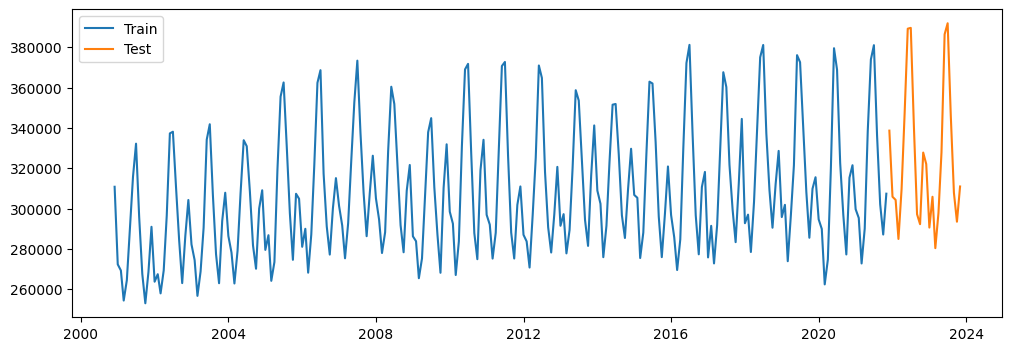

In [42]:
# plot data
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.show()

# Training Holts Winter model

In [43]:
hwes_model = HWES(
    train,
    trend='mul',
    damped_trend=True,
    seasonal='mul',
    seasonal_periods=12
    ).fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [44]:
forecast_hwes = hwes_model.forecast(steps=len(test))
df_comp['HWES'] = forecast_hwes

# Training ARIMA model

In [45]:
auto_arima(train, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=5144.772, Time=4.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5129.117, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5150.427, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5128.154, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5133.730, Time=0.07 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=5126.418, Time=0.22 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=5128.165, Time=0.81 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=5129.976, Time=1.44 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=5121.441, Time=1.07 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=5148.369, Time=0.98 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=5148.367, Time=1.05 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=5147.376, Time=1.97 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5148.580, Time=0.19 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=5118.115, Time=0.97 sec
 ARIMA(2,0,1)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  252
Model:             SARIMAX(2, 0, 1)x(0, 1, [], 12)   Log Likelihood               -2554.058
Date:                             Fri, 26 Apr 2024   AIC                           5118.115
Time:                                     08:30:20   BIC                           5135.518
Sample:                                 12-01-2000   HQIC                          5125.127
                                      - 11-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    865.8766    715.322      1.210      0.226    -536.128    2267.881
ar.L1          0.6446      0.377      1.710      0.087      -0.094       1.383
ar.L2         -0.1218      0.036     -3.360      0.001      -0.193      -0.051
ma.L1         -0.4769      0.379     -1.259      0.208      -1.219       0.265
sigma2      1.024e+08      0.007   1.52e+10      0.000    1.02e+08    1.02e+08
===================================================================================
Ljung-Box (L1) (Q):                  47.35   Jarque-Bera (JB):                19.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.36
Prob(H) (two-sided):                  0.65   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.86e+25. Standard errors may be unstable.
"""

In [46]:
model_sarimax = SARIMAX(train, order=(2,0,1), seasonal_order=(0,1,0,12))
fit_SARIMAX = model_sarimax.fit()
fit_SARIMAX.summary()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  252
Model:             SARIMAX(2, 0, 1)x(0, 1, [], 12)   Log Likelihood               -2569.022
Date:                             Fri, 26 Apr 2024   AIC                           5146.044
Time:                                     08:30:20   BIC                           5159.967
Sample:                                 12-01-2000   HQIC                          5151.654
                                      - 11-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6263      0.276      2.268      0.023       0.085       1.167
ar.L2         -0.1184      0.029     -4.036      0.000      -0.176      -0.061
ma.L1         -0.4522      0.277     -1.631      0.103      -0.996       0.091
sigma2      6.918e+07    5.3e-09    1.3e+16      0.000    6.92e+07    6.92e+07
===================================================================================
Ljung-Box (L1) (Q):                  44.65   Jarque-Bera (JB):                37.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.46
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.26e+31. Standard errors may be unstable.
"""

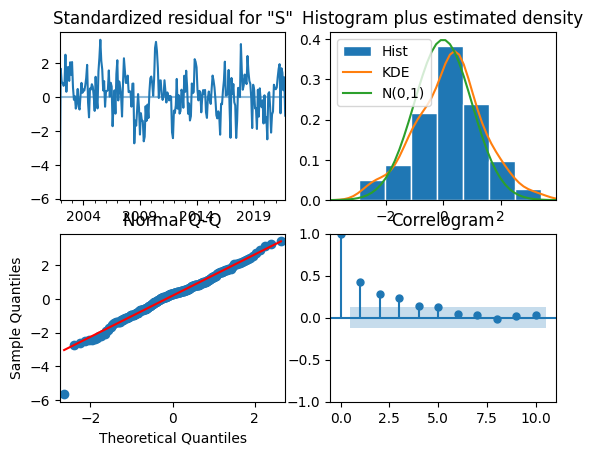

In [47]:
fit_SARIMAX.plot_diagnostics();

In [48]:
start = len(train)
end = len(train) + len(test) -1
prediction_SARIMA = fit_SARIMAX.predict(start, end).rename('SARIMA')

In [49]:
df_comp['SARIMA'] = prediction_SARIMA

# Comparison of both models

<Axes: xlabel='Date'>

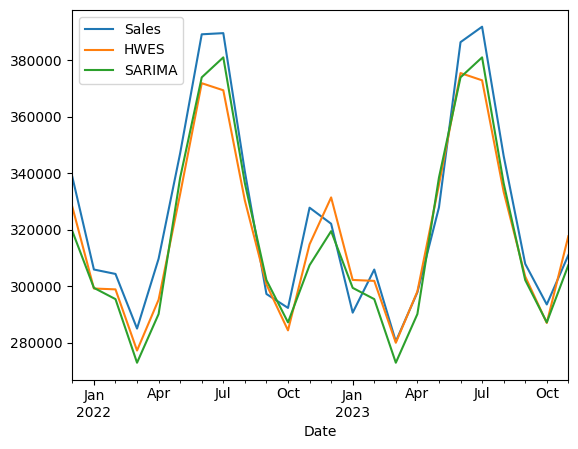

In [50]:
df_comp.plot()

In [51]:
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
mean_absolute_percentage_error(test, forecast_hwes) * 100

2.803862763088129

In [53]:
mean_absolute_percentage_error(test, prediction_SARIMA) * 100

2.9374104597535875